<a href="https://colab.research.google.com/github/KonsumGandalf/proccessMining/blob/colab/proccessMining/src/data/course_python_data/Kopie_von_e3_1_Pareto_Distribution_Variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pm4py

     |████████████████████████████████| 1.7 MB 6.8 MB/s 
     |████████████████████████████████| 205 kB 75.4 MB/s 
     |████████████████████████████████| 70 kB 11.1 MB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23588 sha256=607e33bf657515cb2fde93747db1c1cad2c0ed56cd72d4db25abf61b258b8fce
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pareto

import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter


In [3]:
# Create a function to convert a string into a list
# used for converting the string of activites describing a variant into a list of activities
def String2List(string,separ):
    li = list(string.split(separ))
    return li

In [4]:
# Load Event Log file in CSV

log_csv = pd.read_csv('https://raw.githubusercontent.com/paoloceravolo/PM-Regensburg/main/CallCenterLog.csv', sep=',')
log_csv = dataframe_utils.convert_timestamp_columns_in_df(log_csv)

log_csv = log_csv.sort_values('Start Date')

log_csv.rename(columns={'Case ID': 'case:concept:name', 'Start Date': 'start_timestamp', 'End Date': 'time:timestamp', 'Activity': 'concept:name', 'Resource': 'org:resource'}, inplace=True) #change the name to a colum
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:concept:name'} # identify the case_id_key name (if not change it will simply be the mane of the coloumn)

# Convert the dataframe to an event log dictionary 

event_log = log_converter.apply(log_csv, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

 # first case first event
print(event_log[0][0])


{'concept:name': 'Inbound Email', 'start_timestamp': Timestamp('2010-01-03 01:05:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2010-04-03 08:24:00+0000', tz='UTC'), 'Agent Position': 'FL', 'Customer ID': 'Customer 1878', 'Topic': 'Queries', 'Service Type': 'Product Assistance', 'org:resource': 'Samuil'}


In [5]:
# Extract the variants from an event log

from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(event_log)

# Count the cases per varaint 

from pm4py.statistics.traces.generic.log import case_statistics
variants_count = case_statistics.get_variant_statistics(event_log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

#print(variants)

print(variants_count)

[{'variant': 'Inbound Call', 'count': 2449}, {'variant': 'Inbound Call,Inbound Call', 'count': 266}, {'variant': 'Inbound Call,Handle Case', 'count': 111}, {'variant': 'Inbound Email,Email Outbound,Handle Email', 'count': 86}, {'variant': 'Inbound Call,Inbound Call,Inbound Call', 'count': 59}, {'variant': 'Handle Email,Handle Email', 'count': 57}, {'variant': 'Handle Email,Call Outbound', 'count': 38}, {'variant': 'Inbound Email,Email Outbound,Email Outbound', 'count': 37}, {'variant': 'Inbound Email,Handle Email,Email Outbound', 'count': 36}, {'variant': 'Inbound Call,Inbound Call,Handle Case', 'count': 29}, {'variant': 'Inbound Call,Inbound Call,Inbound Call,Inbound Call', 'count': 19}, {'variant': 'Inbound Call,Call Outbound', 'count': 18}, {'variant': 'Handle Case,Inbound Call', 'count': 18}, {'variant': 'Inbound Call,Handle Case,Inbound Call', 'count': 17}, {'variant': 'Inbound Email,Call Outbound,Email Outbound,Handle Email', 'count': 15}, {'variant': 'Handle Case', 'count': 15},

In [6]:
# Transform records (a list of dicts) into a dataframe
# used to convert the variants_count dictionary into a data frame

variants_df = pd.DataFrame.from_records(variants_count)
variants_df

,variant,count
0,Inbound Call,2449
1,"Inbound Call,Inbound Call",266
2,"Inbound Call,Handle Case",111
3,"Inbound Email,Email Outbound,Handle Email",86
4,"Inbound Call,Inbound Call,Inbound Call",59
...,...,...
399,"Call Outbound,Call Outbound,Call Outbound,Call...",1
400,"Call Outbound,Call Outbound,Call Outbound,Call...",1
401,"Call Outbound,Call Outbound,Call Outbound,Call...",1
402,"Call Outbound,Call Outbound,Call Outbound,Call...",1


0     2449
1      266
2      111
3       86
4       59
      ... 
95       2
96       2
97       2
98       2
99       2
Name: count, Length: 100, dtype: int64
['Inbound Call', 'Handle Case']


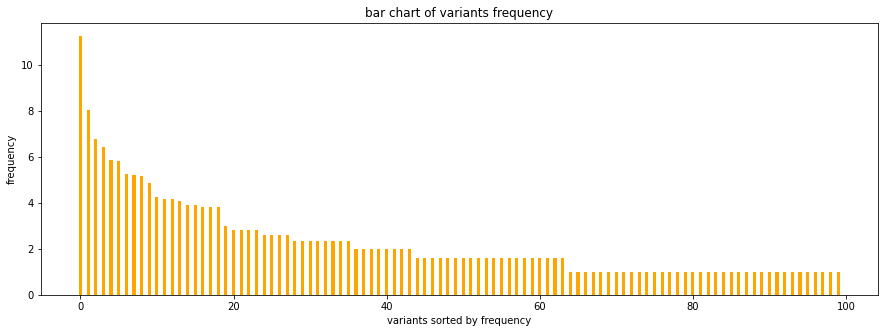

In [7]:
# Prepare the dimensions to plot
# Put variants and counts into lists of prefered length

variant =variants_df.head(100).index
frequency = variants_df['count'].head(100)
print(frequency)
# return a list of log values from a list 
frequency_log = [math.log(i, 2) for i in frequency] 
#print(frequency)
#print(frequency_log)

# Plot the histogram of the frequencies

fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(variant, frequency_log, color ='orange',
        width = 0.4)
 
plt.xlabel("variants sorted by frequency")
plt.ylabel("frequency")
plt.title("bar chart of variants frequency")
#plt.show()

# Convert the string of activites in a variant to a list 
print(String2List(variants_df['variant'][2],","))

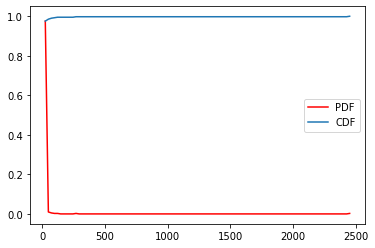

In [8]:

%matplotlib inline
  
data= variants_df['count']

# getting data of the histogram
count, bins_count = np.histogram(data, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [11]:
# Fileter the log based on a specific variant

from pm4py.algo.filtering.log.attributes import attributes_filter

# Get the list of activities of a variant, variants are indexed based on frequency rank 
att = String2List(variants_df['variant'][0],",")
variants_df['variant'][0]
# Filter based on a list of atribites 
# used for getting the events connected to a specific list of activities i.e. a variant
# PROBLEM the elements in the lsit are filterd in conjunctive way 
tracefilter_log_pos = attributes_filter.apply(event_log, variants_df['variant'][0],
                                          parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: "concept:name", attributes_filter.Parameters.POSITIVE: True})
print(variants_df['variant'][0])
print(event_log)
#print(tracefilter_log_pos)
#print(len(tracefilter_log_pos)) # it provides the number of events involve in the filtered cases

# Convert Event log to Data Frame

data_log = log_converter.apply(tracefilter_log_pos, variant=log_converter.Variants.TO_DATA_FRAME)

profile = data_log.groupby('case:concept:name').agg(
Activity = ('concept:name', 'count'),\
Activity_list = ('concept:name', lambda x: ', '.join(x)),\
# Count distinct values
Resource = ('org:resource', 'nunique'),\
# Delta of a column
Delta_start_time = ('start_timestamp', lambda x: x.max() - x.min()),\
)

#pd.set_option('display.max_columns', 20) # print more columns 
#print(profile.head())
profile

Inbound Call
[{'attributes': {'concept:name': 'Case 2234'}, 'events': [{'concept:name': 'Inbound Email', 'start_timestamp': Timestamp('2010-01-03 01:05:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2010-04-03 08:24:00+0000', tz='UTC'), 'Agent Position': 'FL', 'Customer ID': 'Customer 1878', 'Topic': 'Queries', 'Service Type': 'Product Assistance', 'org:resource': 'Samuil'}, '..', {'concept:name': 'Handle Case', 'start_timestamp': Timestamp('2010-04-03 11:23:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2010-04-03 11:23:00+0000', tz='UTC'), 'Agent Position': 'FL', 'Customer ID': 'Customer 1878', 'Topic': 'Queries', 'Service Type': 'Product Assistance', 'org:resource': 'Samuil'}]}, '....', {'attributes': {'concept:name': 'Case 3667'}, 'events': [{'concept:name': 'Inbound Call', 'start_timestamp': Timestamp('2010-12-03 17:56:00+0000', tz='UTC'), 'time:timestamp': Timestamp('2010-12-03 17:58:00+0000', tz='UTC'), 'Agent Position': 'FL', 'Customer ID': 'Customer 3055', 'Topic': 'Rese

,Activity,Activity_list,Resource,Delta_start_time
case:concept:name,,,,
Case 1,3,"Inbound Call, Handle Case, Call Outbound",2,61 days 03:40:00
Case 100,1,Inbound Call,1,0 days 00:00:00
Case 1000,3,"Inbound Call, Handle Case, Handle Case",1,0 days 00:04:00
Case 1001,1,Inbound Call,1,0 days 00:00:00
Case 1002,2,"Inbound Call, Call Outbound",1,30 days 21:03:00
...,...,...,...,...
Case 995,1,Inbound Call,1,0 days 00:00:00
Case 996,3,"Inbound Call, Inbound Call, Inbound Call",2,75 days 00:52:00
Case 997,2,"Inbound Call, Inbound Call",2,0 days 08:11:00


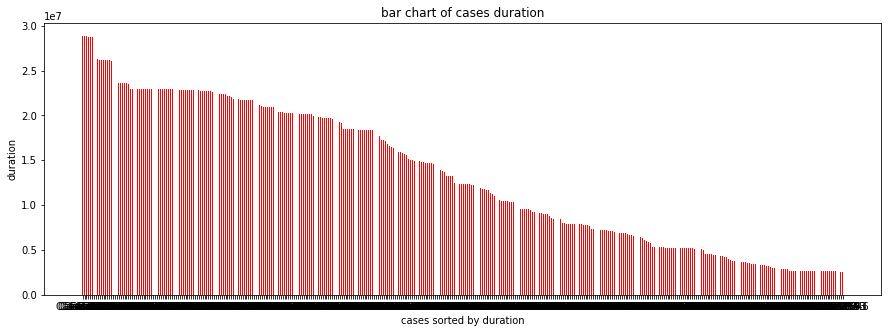

In [ ]:
# Transform duration in a number 
profile['Duration'] = [i.total_seconds() for i in profile['Delta_start_time']]

# Order by a coulumn 
profile = profile.sort_values(["Duration"], ascending = (False))

# Prepare the dimensions to plot
case = profile.head(400).index
duration = profile['Duration'].head(400)

# Plot the histogram of the durations

fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(case, duration, color ='red',
        width = 0.4)
 
plt.xlabel("cases sorted by duration")
plt.ylabel("duration")
plt.title("bar chart of cases duration")
plt.show()


case:concept:name
Case 3478    28862460.0
Case 2999    28848180.0
Case 2882    28842600.0
Case 2409    28795440.0
Case 3572    28777680.0
                ...    
Case 2603           0.0
Case 1399           0.0
Case 2605           0.0
Case 2607           0.0
Case 999            0.0
Name: Duration, Length: 3342, dtype: float64


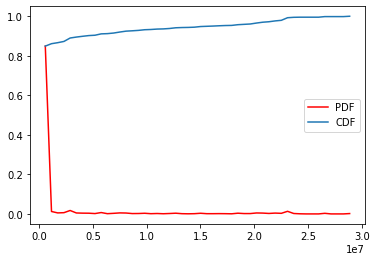

In [ ]:

print(profile['Duration'])

%matplotlib inline
  
data= profile['Duration']

# getting data of the histogram
count, bins_count = np.histogram(data, bins=50)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [ ]:
# Get the list of activities of a variant, variants are indexed based on frequency rank 
att = variants_df['variant'][3]
att = att.replace(',', ', ') # required to have the exach match when filtering the profile

# Generate a event log containing all the variants in the dictionary variants
filtered_log1 = variants_filter.apply(event_log, variants)

# Convert Event log to Data Frame

data_log = log_converter.apply(filtered_log1, variant=log_converter.Variants.TO_DATA_FRAME)

profile = data_log.groupby('case:concept:name').agg(
Activity = ('concept:name', 'count'),\
Activity_list = ('concept:name', lambda x: ', '.join(x)),\
# Count distinct values
Resource = ('org:resource', 'nunique'),\
# Delta of a column
Delta_start_time = ('start_timestamp', lambda x: x.max() - x.min()),\
)

#pd.set_option('display.max_columns', 20) # print more columns 
#print(profile.head())
profile

filtered_profile = profile.loc[profile['Activity_list'] == att]

filtered_profile

,Activity,Activity_list,Resource,Delta_start_time
case:concept:name,,,,
Case 1022,3,"Inbound Email, Email Outbound, Handle Email",1,91 days 18:21:00
Case 110,3,"Inbound Email, Email Outbound, Handle Email",1,0 days 20:34:00
Case 1109,3,"Inbound Email, Email Outbound, Handle Email",1,61 days 03:45:00
Case 1205,3,"Inbound Email, Email Outbound, Handle Email",1,60 days 21:25:00
Case 1206,3,"Inbound Email, Email Outbound, Handle Email",1,61 days 01:05:00
...,...,...,...,...
Case 852,3,"Inbound Email, Email Outbound, Handle Email",1,2 days 00:52:00
Case 877,3,"Inbound Email, Email Outbound, Handle Email",1,1 days 11:55:00
Case 880,3,"Inbound Email, Email Outbound, Handle Email",1,0 days 17:27:00


In [ ]:
# Create a new profile to observe the average duration of cases in a variant

# Include Case ID as a column, previously it was just an idnex 
profile['CaseID'] = profile.index

# Transform duration in a number 
profile['Duration'] = [i.total_seconds() for i in profile['Delta_start_time']]

#print(profile)

profile_variants = profile.groupby('Activity_list').agg(
Avg_Activity = ('Activity', 'mean'),\
# Count distinct values
Cases = ('CaseID', 'nunique'),\
Avg_Resource = ('Resource', 'mean'),\
# Delta of a column
Avg_Delta_start_time = ('Duration', 'mean'),\
Std_Delta_start_time = ('Duration', 'std'),\
)

profile_variants.sort_values(["Cases"], ascending = (False))


,Avg_Activity,Cases,Avg_Resource,Avg_Delta_start_time,Std_Delta_start_time
Activity_list,,,,,
Inbound Call,1,2449,1.000000,0.000000e+00,0.000000e+00
"Inbound Call, Inbound Call",2,266,1.890977,3.110271e+06,6.307244e+06
"Inbound Call, Handle Case",2,111,1.405405,1.610850e+06,3.710265e+06
"Inbound Email, Email Outbound, Handle Email",3,86,1.000000,2.648965e+06,3.173832e+06
"Inbound Call, Inbound Call, Inbound Call",3,59,2.677966,4.202066e+06,6.374213e+06
...,...,...,...,...,...
"Handle Email, Handle Case, Handle Case, Call Outbound, Inbound Call, Handle Case, Call Outbound, Call Outbound",8,1,5.000000,2.037558e+07,NaN
"Handle Email, Handle Case, Handle Case",3,1,1.000000,1.140000e+03,NaN
"Handle Email, Handle Case, Email Outbound, Inbound Email",4,1,1.000000,4.691820e+06,NaN


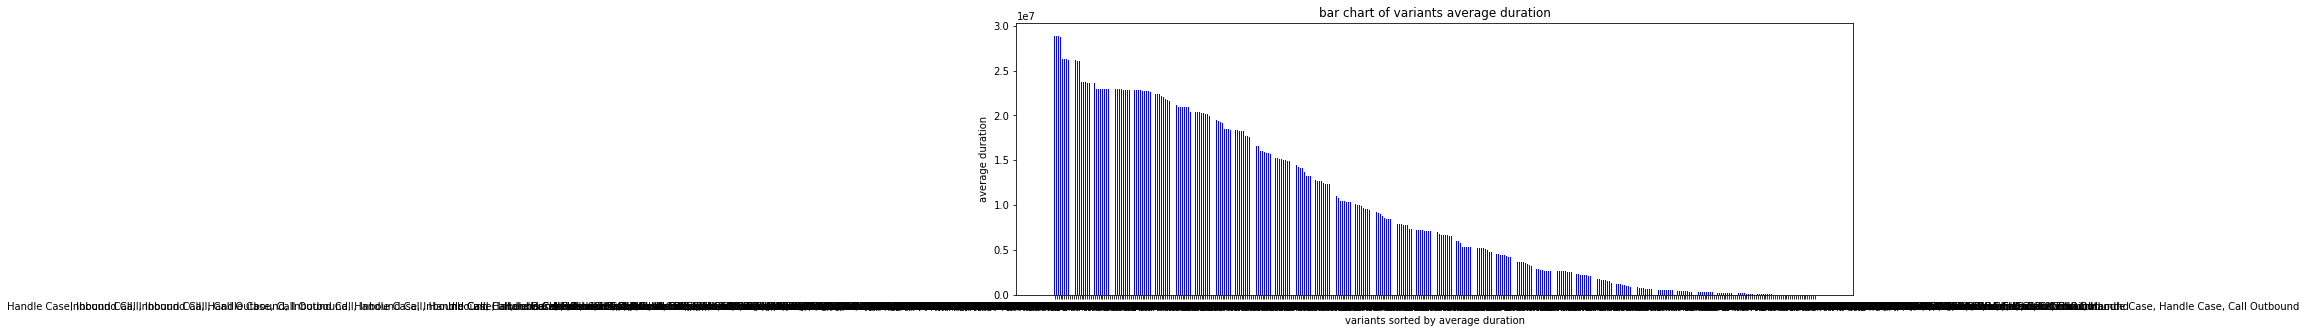

In [ ]:
# Order by a coulumn 
profile_variants = profile_variants.sort_values(["Avg_Delta_start_time"], ascending = (False))

# Prepare the dimensions to plot
varaints = profile_variants.head(400).index
avg_duration = profile_variants['Avg_Delta_start_time'].head(400)

# Plot the histogram of the frequencies

fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(varaints, avg_duration, color ='blue',
        width = 0.4)
 
plt.xlabel("variants sorted by average duration")
plt.ylabel("average duration")
plt.title("bar chart of variants average duration")
plt.show()

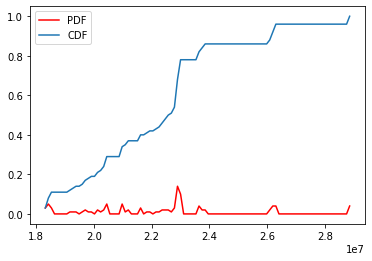

In [ ]:
# Something in between Pareto and Normal distribution
#print(profile_variants['Avg_Delta_start_time'].head(100))

%matplotlib inline
  
data= profile_variants['Avg_Delta_start_time'].head(100)

# getting data of the histogram
count, bins_count = np.histogram(data, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [ ]:
# filter the most common variants

#from pm4py.algo.filtering.log.variants import variants_filter

# Count the cases per varaint 

#from pm4py.statistics.traces.generic.log import case_statistics

#variants_countTopic = case_statistics.get_variant_statistics(event_log)
#variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)


#print(variants)

#print(variants_count)
#filtered_log = variants_filter.filter_log_variants_percentage(event_log, percentage=)


#filter_log = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
#filter_log

,concept:name,start_timestamp,time:timestamp,Agent Position,Customer ID,Topic,Service Type,org:resource,case:concept:name
0,Inbound Call,2010-02-03 07:20:00+00:00,2010-02-03 07:44:00+00:00,FL,Customer 2428,Queries,Product Assistance,Kenny,Case 2890
1,Inbound Call,2010-02-03 07:57:00+00:00,2010-02-03 08:18:00+00:00,FL,Customer 857,Queries,Referred to Servicer,Kenny,Case 1024
2,Inbound Call,2010-02-03 07:58:00+00:00,2010-02-03 08:12:00+00:00,FL,Customer 549,Queries,Product Assistance,Johan,Case 650
3,Inbound Call,2010-02-03 08:20:00+00:00,2010-02-03 08:26:00+00:00,FL,Customer 1551,Queries,Product Assistance,Kenny,Case 1848
4,Inbound Call,2010-02-03 08:23:00+00:00,2010-02-03 08:24:00+00:00,FL,Customer 1890,Reservations Pro,Referred to Servicer,Johan,Case 2247
...,...,...,...,...,...,...,...,...,...
7543,Call Outbound,2010-03-27 09:46:00+00:00,2010-03-27 09:48:00+00:00,FL,Customer 3032,Queries,Referred to Servicer,Samuil,Case 3643
7544,Call Outbound,2010-03-27 11:53:00+00:00,2010-03-27 11:55:00+00:00,FL,Customer 3032,Queries,Referred to Servicer,Samuil,Case 3643
7545,Call Outbound,2010-07-03 11:52:00+00:00,2010-07-03 11:52:00+00:00,FL,Customer 2580,Queries,Referred to Servicer,Jochem,Case 3077
7546,Call Outbound,2010-07-03 11:55:00+00:00,2010-07-03 11:55:00+00:00,FL,Customer 2580,Queries,Referred to Servicer,Jochem,Case 3077


In [ ]:
profile = log_csv.groupby('Topic').agg(\
       Topics = ('Topic', 'count'), \                               
                                       
                                       
                                       
)

print(profile)

SyntaxError: ignored